###Laboratorio No. 1 Text Mining & Image Recognition

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

###Problema 1:
Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcion debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos:

Si el parametro color vale 1, la imagen debe mostrar activos unicamente el color azul.

Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.

Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.

Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y verde.

Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y azul.

Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

In [107]:
def changeColor(imagen, color):
  alto = imagen.shape[0]
  ancho = imagen.shape[1]  
  newImg = np.zeros((alto, ancho, 3))

  for i in range(0, alto):
    for j in range(0, ancho):
      pixel = imagen[i, j]

      blue = pixel[2]
      green = pixel[1]
      red = pixel[0]

      if color == 1:
        #print('azul')
        newImg[i, j] = [blue,0,0]
      elif color == 2:
        #print('verde')
        newImg[i, j] = [0,green,0]
      elif color == 3:
        #print('rojo')
        newImg[i, j] = [0,0,red]
      elif color == 10:
        #print('rojo y verde')
        newImg[i, j] = [0,green,red]
      elif color == 20:
        #print('verde y azul')
        newImg[i, j] = [blue,green,0]
      elif color ==  30:
        #print('azul y rojo')
        newImg[i, j] = [blue,0,red]
      else:   #si es otro valor devuelve la misma imagen
        newImg[i, j] = [blue,green,red]
  cv2.imwrite("newImage.jpg", newImg)
  
  newImage = cv2.imread("newImage.jpg")
  newImage = cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB)
  return newImage
      
   


In [108]:
img = cv2.imread('Paris.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convertimos de BGR a RGB

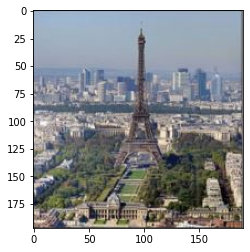

In [109]:
plt.imshow(img)
plt.show()

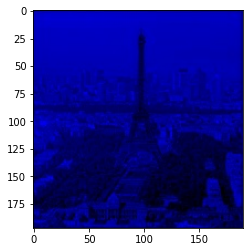

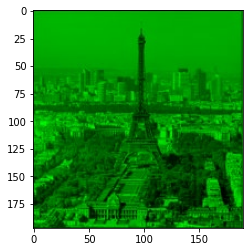

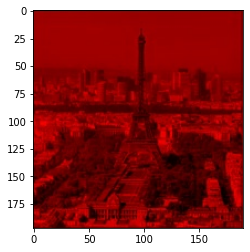

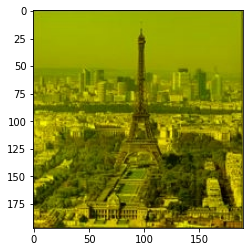

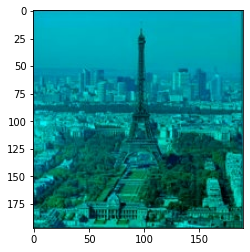

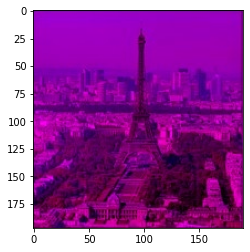

In [115]:
nueva1 = changeColor(img,1)
nueva2 = changeColor(img,2)
nueva3 = changeColor(img,3)
nueva10 = changeColor(img,10)
nueva20 = changeColor(img,20)
nueva30 = changeColor(img,30)
plt.imshow(nueva1)
plt.show()
plt.imshow(nueva2)
plt.show()
plt.imshow(nueva3)
plt.show()
plt.imshow(nueva10)
plt.show()
plt.imshow(nueva20)
plt.show()
plt.imshow(nueva30)
plt.show()

###Problema 2:
En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1,imagen2, perro) estas imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la imagen original a color.

In [116]:
def imagenGrayTColor(img_blue, img_green, img_red):
  alto = img_blue.shape[0]
  ancho = img_blue.shape[1]  
  newImg_GTC = np.zeros((alto, ancho, 3))

  for i in range(0, alto):
    for j in range(0, ancho):
      pixel_blue = img_blue[i, j][2]
      pixel_green = img_green[i, j][1]
      pixel_red = img_red[i, j][0]

      newImg_GTC[i, j] = [pixel_red,pixel_green,pixel_blue]
      
  cv2.imwrite("newImage_GTC.jpg", newImg_GTC)
  
  newImg_GTC = cv2.imread("newImage_GTC.jpg")
  return newImg_GTC


In [117]:
imgB = cv2.imread('perro_salida_gray_azul.jpg')
imgG = cv2.imread('perro_salida_gray_verde.jpg')
imgR = cv2.imread('perro_salida_gray_rojo.jpg')

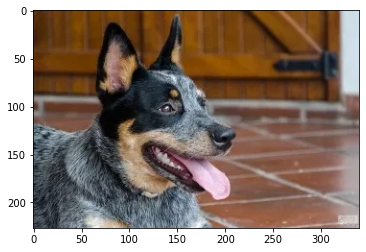

In [118]:
nuevaGTC = imagenGrayTColor(imgB, imgG, imgR)
plt.imshow(nuevaGTC)
plt.show()

###Problema 3:
Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [119]:
def imagen_ColorTGray(imagen):
  alto = imagen.shape[0]
  ancho = imagen.shape[1]  
  newImg_CTG_BG = np.zeros((alto, ancho, 3))
  newImg_CTG_GG = np.zeros((alto, ancho, 3))
  newImg_CTG_RG = np.zeros((alto, ancho, 3))

  newImg_CTG_RG = imagen[:,:,0]
  newImg_CTG_GG = imagen[:,:,1]
  newImg_CTG_BG = imagen[:,:,2]

     
  cv2.imwrite("ImagenRedGray.jpg", newImg_CTG_RG)
  cv2.imwrite("ImagenGreenGray.jpg", newImg_CTG_GG)
  cv2.imwrite("ImagenBlueGray.jpg", newImg_CTG_BG)
  
  newImg_CTG_RG = cv2.imread("ImagenRedGray.jpg")
  newImg_CTG_GG = cv2.imread("ImagenGreenGray.jpg")
  newImg_CTG_BG = cv2.imread("ImagenBlueGray.jpg")

  return newImg_CTG_RG, newImg_CTG_GG, newImg_CTG_BG

In [120]:
imagenColor = cv2.imread('Paris.JPG')
imagenColor = cv2.cvtColor(imagenColor, cv2.COLOR_BGR2RGB)


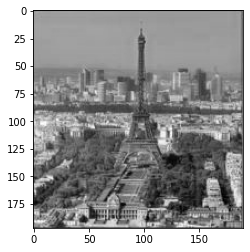

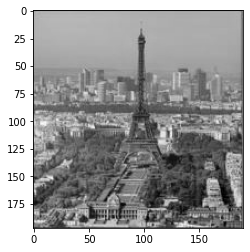

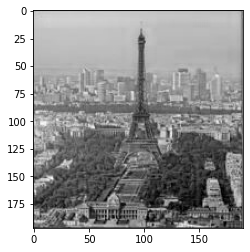

In [121]:
nuevaCTG_R, nuevaCTG_G, nuevaCTG_B = imagen_ColorTGray(imagenColor)
plt.imshow(nuevaCTG_R)
plt.show()
plt.imshow(nuevaCTG_G)
plt.show()
plt.imshow(nuevaCTG_B)
plt.show()

###Problema 4:
Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una linea vertical la cual muestre el valor de la media de la distribucion.

In [122]:
def printHistograma(data):
  fig  = plt.figure()
  ax = fig.add_subplot(2,2,1)
  plt.axvline(x=int(df['Rojo'].mean()), ymin=0, ymax=0.9, color="black")
  sns.distplot(data['Rojo'],kde = True, color="red")
  
  ax = fig.add_subplot(2,2,2)
  plt.axvline(x=int(df['Verde'].mean()), ymin=0, ymax=0.9, color="black")
  sns.distplot(data['Verde'],kde = True, color="green")

  ax = fig.add_subplot(2,2,3)
  plt.axvline(x=int(df['Azul'].mean()), ymin=0, ymax=0.9, color="black")
  sns.distplot(data['Azul'],kde = True, color="blue")

  ax = fig.add_subplot(2,2,4)
  plt.axvline(x=int(df['Gris'].mean()), ymin=0, ymax=0.9, color="black")
  sns.distplot(data['Gris'],kde = True, color="gray")
  fig.set_size_inches(15,8)
  plt.show()

def imagenHistograma(imagen):
  arrayR = []
  arrayG = []
  arrayB = []
  arrayGray = []
  alto = imagenColor.shape[0]
  ancho = imagenColor.shape[1] 

  for i in range(0, alto):
    for j in range(0, ancho):
      arrayR = np.append(arrayR,imagenColor[i,j][0])
      arrayG = np.append(arrayG,imagenColor[i,j][1])
      arrayB = np.append(arrayB,imagenColor[i,j][2])
      arrayGray = np.append(arrayGray,int((imagenColor[i,j][0]+imagenColor[i,j][1]+imagenColor[i,j][2])/3))
  df_colores = pd.DataFrame({'Rojo': arrayR,
                   'Verde':arrayG,
                   'Azul': arrayB,
                   'Gris': arrayGray})
  printHistograma(df_colores)
 

In [123]:
imagenColor = cv2.imread('Paris.JPG')
imagenColor = cv2.cvtColor(imagenColor, cv2.COLOR_BGR2RGB)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your

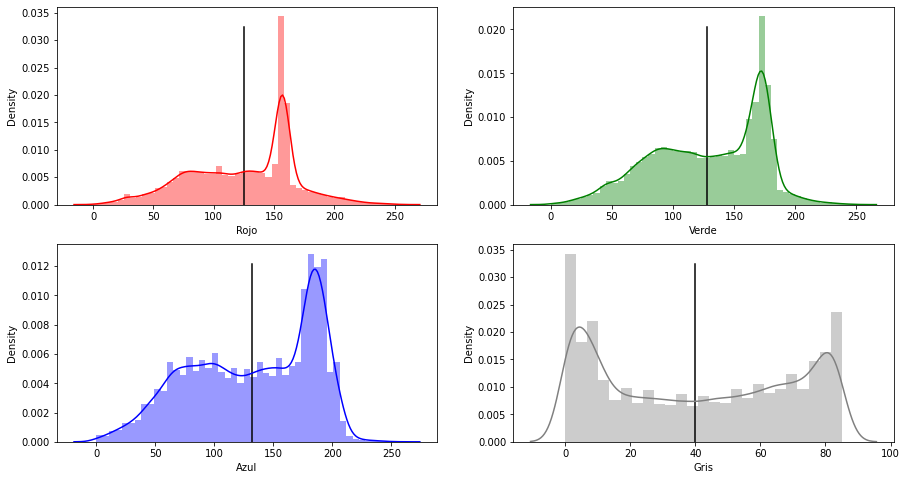

In [124]:
imagenHistograma(imagenColor)

###Problema 5:
Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice una escala de grises ponderada (notar que no existe una solucion unica).

In [125]:
def imageGrayPond(imagen):
  alto = imagen.shape[0]
  ancho = imagen.shape[1]
  gris_ponderado = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
        pixel = imagen[i, j]
        
        blue = pixel[2]
        green = pixel[1]
        red = pixel[0]
        
        #escala de grises ponderada
        gris_ponderado[i, j] = int(0.299*blue + 0.587*green + 0.114*red) 
  
  cv2.imwrite("imagenGrisPonderado.jpg", gris_ponderado)
  newImg_GP = cv2.imread("imagenGrisPonderado.jpg")
  return newImg_GP


In [126]:
imagenColor = cv2.imread('Paris.JPG')
imagenColor = cv2.cvtColor(imagenColor, cv2.COLOR_BGR2RGB)

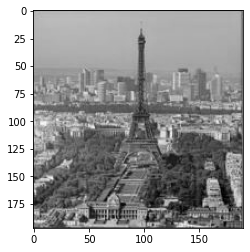

In [127]:
imagenGrisPond = imageGrayPond(imagenColor)
plt.imshow(imagenGrisPond)
plt.show()

###Problema 6:
Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajo los demas ejercicios.

**HSV** es una representación del color en tres dimensiones que se basa en los componentes tinte, matiz o tonalidad, saturación y brillo por sus siglas en ingles Hue, Saturation, Value.

El color HSV es una transformación no lineal del modelo RGB en coordenadas cilindricas.

El matiz se representa por una región circular. El angulo que representa el matiz, normalmente esta definido entre 0 y 360 grados.

La saturación y el brillo se representa por una region triangular separada. Generalmente el eje horizontal representa la saturación y el eje vertical el valor del color.

El nivel saturación, esta dado entre 0 y 1, 0 representa sin saturación alguna (blanco), hasta 1 que sería el matiz en toda su intensidad. Es común también darlo en porcentajes de 0%-100%

El nivel del brillo esta dado entre 0 y 1. 0 es negro; 1, blanco. Al igual que la saturación puede darse en porcentajes entre 0% y 100%. De esta forma el 50% indica el nivel medio o normal del brillo del color.


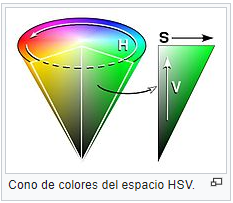

**Transformación de RGB a HSV**

Las transformaciones del sistema de coordenadas euclideanas a cilíndricas entre los espacios RGB y HSV se realizan mediante las operaciones:

En HSV se tienen las componentes (H,S,V), para calcular H se utiliza la siguiente transformación, se debe calcular el maximo y el minimo de las componentes RGB normalizadas

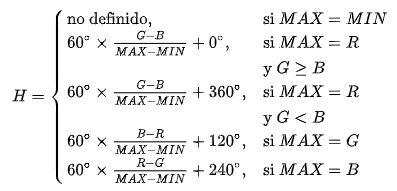

Para calcular la componente S utilizamos el siguiente calculo

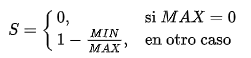

y para calcular el valor de V 

image.png

**Transformación de HSV a RGB**

Para transformar de HSV a RGB se realiza el siguiente procedimiento:

Calcular las versiones normalizadas de s=s/100 y b=b/100.

Determinar la parte entera H y fraccionaria h de t/60o.

Obtener:

p = b(1-s);

q = b(1-sh);

t1 = b(1-s(1-h)).

Según los valores de H:

Si H=0, (r,v,a)=255(b,t1,p).

Si H=1, (r,v,a)=255(q,b,p).

Si H=2, (r,v,a)=255(p,b,t1).

Si H=3, (r,v,a)=255(p,q,b).

Si H=4, (r,v,a)=255(t1,p,b).

Si H=5, (r,v,a)=255(b,p,q).